# Importing Data

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [49]:
data = pd.read_csv("AirPassengers.csv", index_col='Month',date_parser=pd.to_datetime)

<IPython.core.display.Javascript object>


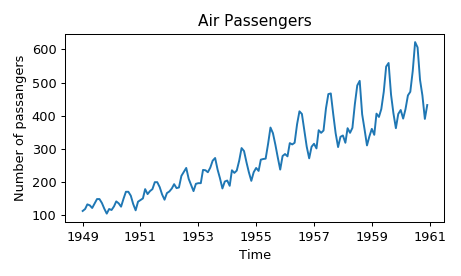

In [50]:
plt.figure(1,figsize=(5,3))
plt.plot(data["#Passengers"]);plt.title("Air Passengers");plt.xlabel("Time");plt.ylabel("Number of passangers")
plt.tight_layout()

# Regressive Model

<IPython.core.display.Javascript object>


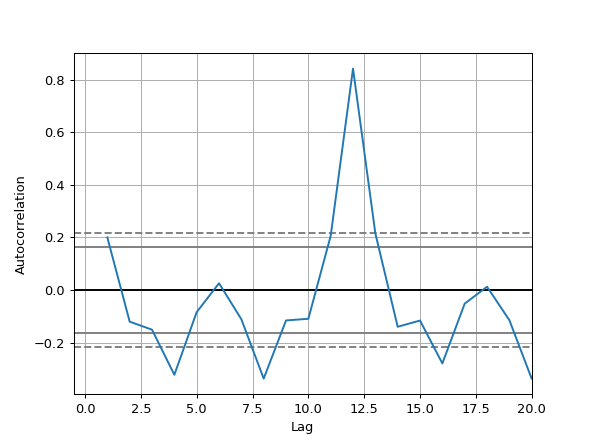

(-0.5, 20)

In [51]:
f,ax = plt.subplots(1,1)
y=np.log(data).diff().dropna()
pd.plotting.autocorrelation_plot(y,ax=ax)
ax.set_xlim(-0.5,20)

In [52]:
def shift(x,lags):
    df = pd.concat([x.shift(lag) for lag in lags],axis=1).dropna()
    df.columns = lags
    return df

In [53]:
n = 4
data_lagged = shift(data["#Passengers"],range(n))
X = data_lagged[np.arange(1,n)]
y = data_lagged[0]

In [54]:
y.shape

(141,)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<IPython.core.display.Javascript object>


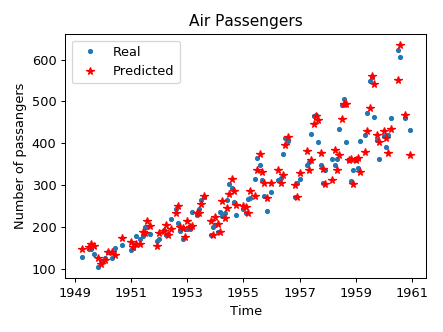

In [56]:
plt.figure(3,figsize=(4*1.2,3*1.2))
plt.title("Air Passengers");plt.xlabel("Time");plt.ylabel("Number of passangers")
plt.plot(y_train,".",label="Real");
y_train_est = pd.Series(regressor.predict(X_train),index = X_train.index)
plt.plot(y_train_est, "r*", label = "Predicted")
plt.legend()
plt.tight_layout()

## Scores

In [57]:
from sklearn.metrics import mean_squared_error
errors = [[regressor.score(X_train,y_train),np.sqrt(mean_squared_error(regressor.predict(X_train),y_train))],
          [regressor.score(X_test,y_test),np.sqrt(mean_squared_error(regressor.predict(X_test),y_test))]]
errors = pd.DataFrame(errors,index = ["Train","Test"],columns=["R2","RMSE"])
errors

,R2,RMSE
Train,0.931876,30.771644
Test,0.922658,32.108457
